First load required libraries

In [1]:
library("phyloseq");packageVersion("phyloseq")
library(ggplot2)
library(ape)
library(dplyr)

[1] ‘1.30.0’

Read in ASV tables

In [2]:
otuDal <- read.table("Dal_Afribiota_18S_V4_sequence_table.18s_R1_lwp.txt", sep="\t", header=T)
otuMI <- read.table("MI_Afribiota_18S_V4_ASV_table_20_no_plants_host.txt", sep="\t", header=T)
otu <- dplyr::full_join(otuDal, otuMI)
row.names(otu) <- otu$ASV_IDs
otu <- data.matrix(otu)
otu[is.na(otu)] <- as.numeric(0)

Joining, by = c("ASV_IDs", "CPB004", "CPB012", "CPB013", "CPB017", "CPB019", "CPB021", "CPB024", "CPB025", "CPB027", "CPB029", "CPB031", "CPB033", "CPB036", "CPB037", "CPB040", "CPB041", "CPB042", "CPB043", "CPB044", "CPB045", "CPB048", "CPB053", "CPB059", "CPB060", "CPB061", "CPB068", "CPB077", "CPB078", "CPB079", "CPB084", "CPB088", "CPB091", "CPB092", "CPB094", "CPB095", "CPB096", "CPB097", "CPB098", "CPB099", "CPB100", "CPB101", "CPB102", "CPB103", "CPB104", "CPB105", "CPB106", "CPB107", "CPB108", "CPB109", "CPB110", "CPB111", "CPB112", "CPB113", "CPB114", "CPB115", "CPB116", "CPB117", "CPB118", "CPB120", "CPB121", "CPB122", "CPB123", "CPB124", "CPB125", "CPB126", "CPB128", "CPB129", "CPB130", "CPB131", "CPB132", "CPB133", "CPB134", "CPB135", "CPB136", "CPB137", "CPB138", "CPB140", "CPB141", "CPB142", "CPB143", "CPB144", "CPB145", "CPB146", "CPB147", "CPB148", "CPB152", "CPB153", "CPB154", "CPB155", "CPB157", "CPB158", "CPB159", "CPB160", "CPB161", "CPB163", "CPB164", "CPB165", "CP

Read in mapping file, set as sample data type

In [3]:
map <- as.data.frame(read.table("afribiota_tot_finalS13_26092018_recoded.txt", sep="\t", header=T, row.names=1))
map <- sample_data(map)
map$stunted <- as.factor(map$stunted)

First Entamoeba tree

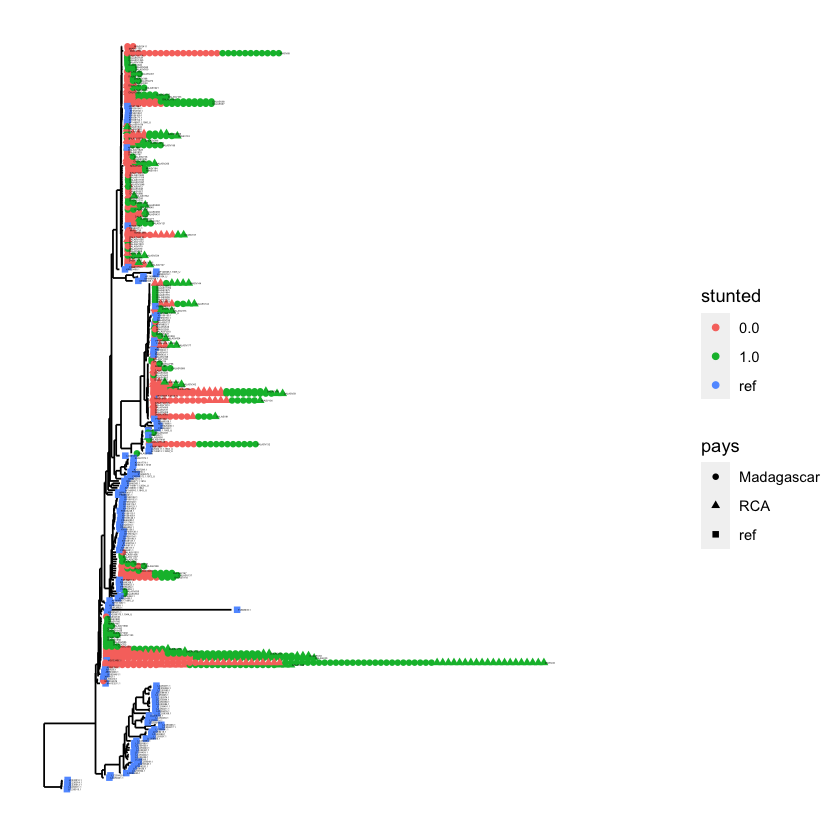

In [4]:
ent.tre <- read.tree("placement_tree/RAxML_bestTree.ent.cons.root.tre")
otutable <- otu_table(otu, taxa_are_rows=T)
physeq <- phyloseq(otutable)
physeq <- merge_phyloseq(physeq, ent.tre, map)
plot_tree(physeq, color="stunted", shape="pays", ladderize="left", label.tips="taxa_names", base.spacing=0.03)

Now the nematode tree

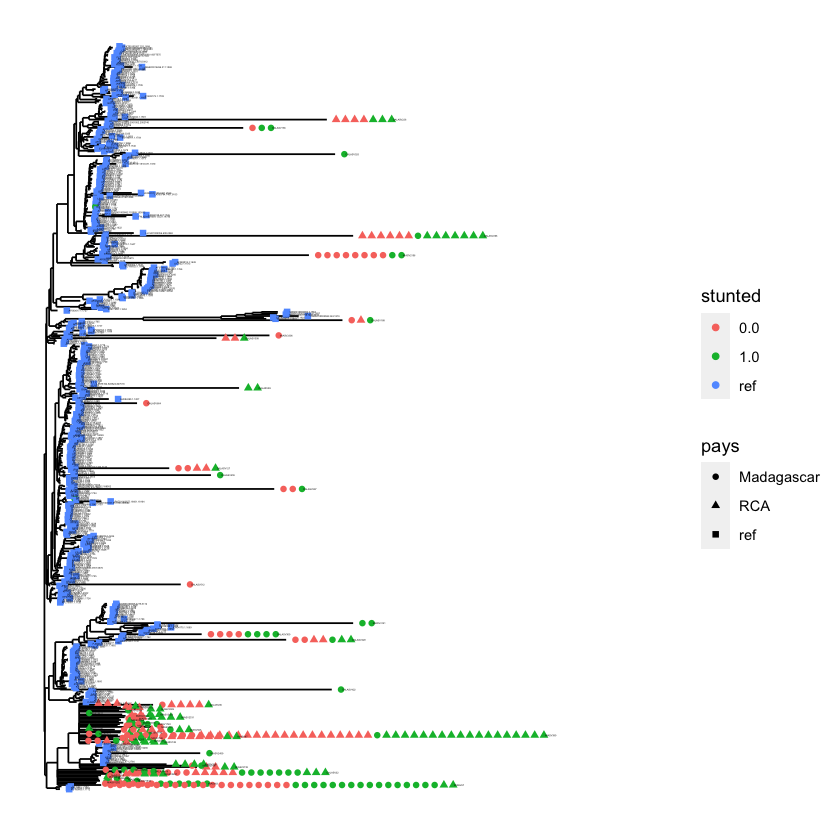

In [7]:
nem.tre <- read.tree("placement_tree/RAxML_bestTree.nem.cons.root.tre")
otutable <- otu_table(otu, taxa_are_rows=T)
physeq <- phyloseq(otutable)
physeq <- merge_phyloseq(physeq, nem.tre, map)
plot_tree(physeq, color="stunted", shape="pays", ladderize="left", label.tips="taxa_names", base.spacing=0.03)